In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
# one day data
data = yf.download(tickers = '^NSEI', start = '2015-01-01',end = '2024-04-07')
# 5 min data
#data = yf.download(tickers = '^NSEI', start = '2024-02-08',end = '2024-04-07', interval = '5m')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800
2015-01-09,8285.450195,8303.299805,8190.799805,8284.500000,8284.500000,148000
2015-01-12,8291.349609,8332.599609,8245.599609,8323.000000,8323.000000,103200
2015-01-13,8346.150391,8356.650391,8267.900391,8299.400391,8299.400391,129600
2015-01-14,8307.250000,8326.450195,8236.650391,8277.549805,8277.549805,146100


In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

#data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [3]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
0,8548.450195,8556.250000,8441.299805,8462.349609,49.186905,8495.855901,8460.133023,8486.430990,-96.250000,8349.450195
1,8445.700195,8446.950195,8337.950195,8349.450195,42.471773,8481.912500,8457.941284,8484.616674,-28.600586,8355.849609
2,8384.450195,8429.500000,8339.750000,8355.849609,42.944828,8469.906511,8455.919667,8482.911150,116.200195,8518.549805
3,8402.349609,8530.099609,8381.200195,8518.549805,53.386177,8474.539205,8457.159868,8483.383186,-53.200195,8477.299805
4,8530.500000,8530.599609,8428.049805,8477.299805,50.857931,8474.802120,8457.558678,8483.302611,-39.299805,8466.549805
5,8505.849609,8525.750000,8433.599609,8466.549805,50.194200,8474.016185,8457.736720,8483.080719,27.100586,8495.150391
6,8468.049805,8520.450195,8425.950195,8495.150391,51.980604,8476.028966,8458.477585,8483.240583,-98.299805,8372.750000
7,8471.049805,8501.349609,8359.750000,8372.750000,44.639084,8466.192874,8456.780009,8481.777131,-5.450195,8299.950195
8,8305.400391,8322.200195,8225.049805,8299.950195,40.953188,8450.360238,8453.674468,8479.368827,-246.950195,7809.000000
9,8055.950195,8060.049805,7769.399902,7809.000000,25.649919,8389.278311,8440.908637,8470.489770,-14.699707,7880.700195


In [4]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.09794169 0.09766245 0.10352982 ... 0.05822389 0.35672179 0.08870597]
 [0.0913418  0.09064922 0.09690663 ... 0.05808737 0.40282802 0.08911767]
 [0.08740757 0.08952953 0.09702197 ... 0.05795904 0.50151651 0.09958471]
 ...
 [0.99143789 0.99221033 0.99731805 ... 0.9970052  0.45568316 0.99485334]
 [0.98674239 0.99371821 0.99464888 ... 0.99847245 0.3695354  1.        ]
 [1.         1.         0.99191248 ... 1.         0.44092608 0.99993881]]


In [6]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 60
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2128
[[[0.09794169 0.09766245 0.10352982 ... 0.08793421 0.06314895 0.05822389]
  [0.0913418  0.09064922 0.09690663 ... 0.08700761 0.06299105 0.05808737]
  [0.08740757 0.08952953 0.09702197 ... 0.08620977 0.06284541 0.05795904]
  ...
  [0.06945136 0.0694202  0.0769985  ... 0.0629004  0.0434027  0.04083655]
  [0.06466284 0.06397259 0.07166662 ... 0.06186436 0.04307372 0.04053764]
  [0.05992247 0.06214066 0.07051628 ... 0.06091972 0.04274962 0.04024155]]

 [[0.0913418  0.09064922 0.09690663 ... 0.08700761 0.06299105 0.05808737]
  [0.08740757 0.08952953 0.09702197 ... 0.08620977 0.06284541 0.05795904]
  [0.08855729 0.09598451 0.09967832 ... 0.08651763 0.06293476 0.05799456]
  ...
  [0.06466284 0.06397259 0.07166662 ... 0.06186436 0.04307372 0.04053764]
  [0.05992247 0.06214066 0.07051628 ... 0.06091972 0.04274962 0.04024155]
  [0.04911215 0.05797635 0.06061832 ... 0.05981758 0.04237616 0.03991041]]

 [[0.08740757 0.08952953 0.09702197 ... 0.08620977 0.06284541 0.05795904]
  [0.08855729 0.0

In [7]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [8]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)


1654
(1654, 60, 8)
(414, 60, 8)
(1654, 1)
(414, 1)
[[0.05228689]
 [0.05092945]
 [0.05378264]
 ...
 [0.62218022]
 [0.64069527]
 [0.6554051 ]]


In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=22, shuffle=True, validation_split = 0.1)

Epoch 1/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0140 - val_loss: 9.8971e-04
Epoch 2/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.7725e-04 - val_loss: 7.4671e-04
Epoch 3/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.9678e-04 - val_loss: 7.2491e-04
Epoch 4/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.4408e-04 - val_loss: 6.1935e-04
Epoch 5/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.0053e-04 - val_loss: 5.6992e-04
Epoch 6/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.7560e-04 - val_loss: 6.0282e-04
Epoch 7/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.8238e-04 - val_loss: 0.0016
Epoch 8/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.3770e-04 - val_loss: 6.6534e-04
Epoch 9/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.7662e-04 - val_loss: 0.0013
Epoch 10/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.6520e-04 - val_loss: 0.0011
Epoch 11/22
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.6

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0.63759655] [0.66710095]
[0.6519665] [0.66744825]
[0.6635783] [0.67019535]
[0.6690037] [0.66979968]
[0.6728936] [0.67079685]
[0.6748301] [0.67900575]
[0.6775433] [0.67962659]
[0.6824345] [0.68762]
[0.68574053] [0.69013868]
[0.6928231] [0.69831541]
Mean Absolute Error: 0.011026116634062165
Mean Squared Error: 0.00019295606715747838
Root Mean Squared Error: 0.01389086272185707


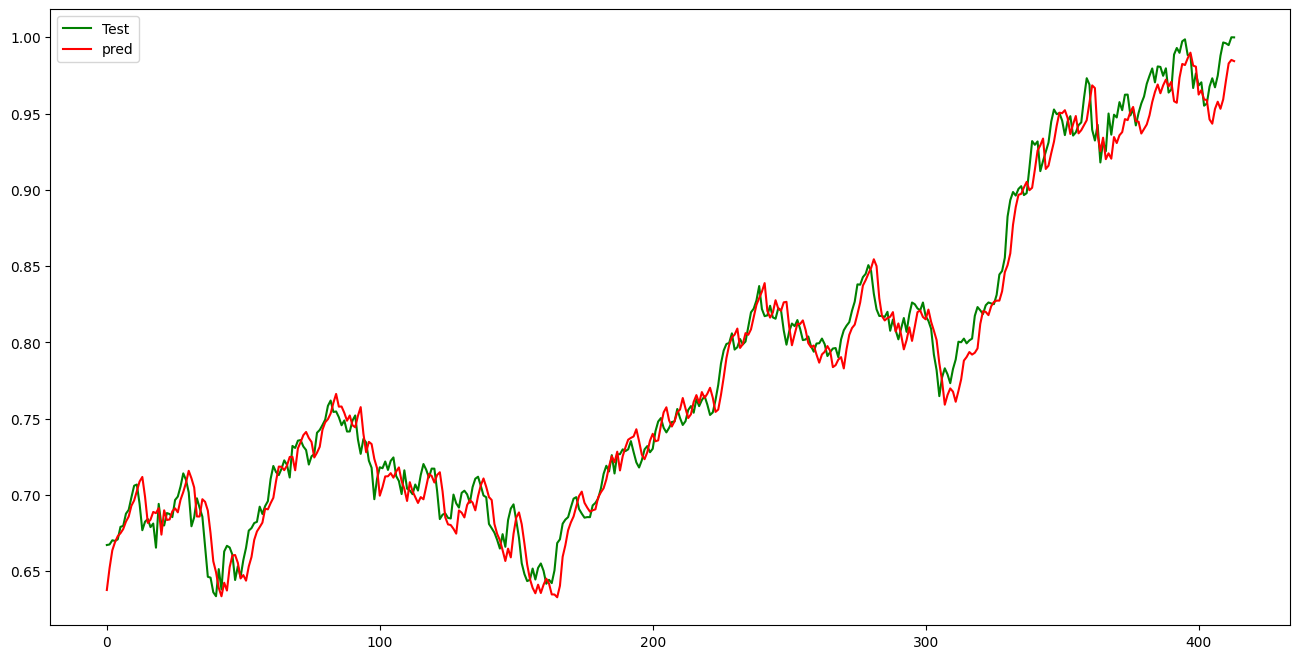

In [11]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'green', label = 'Test')
plt.plot(y_pred, color = 'red', label = 'pred')
plt.legend()
plt.show()